In [1]:
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import matplotlib
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np

!ls ../../logs

256CNN_4layer1024_2epochs5lr
256CNN_4layer1024_2epochs6lr
256CNN_4layer1024_30epochs6lr
256CNN_4layer1024_30epochs7lr_resume
256CNN_4layer1024_6epochs6lr
256proGAN_4layer1024_2epochs6lr
256proGAN_4layer1024_30epochs6lr
256proGAN_4layer1024_6epochs6lr
4layer1024allaround_CNN20epochslr5
4layer1024allaround_CNN20epochslr5_b
4layer1024allaround_pretraining5epochs5lr_actually512
4layer1024allaround_pretraining5epochs5lr_b
4layer512allaround_CNN20epochslr5
4layer512allaround_pretraining5epochs
4layer512allaround_pretraining5epochs5lr
8layer1024allaround_CNN20epochs5lr
8layer1024allaround_CNN20epochs5lr_256encode
8layer1024allaround_CNN20epochs5lr_resume
8layer1024allaround_CNN20epochs5lr_resume2
8layer1024allaround_pretraining5epochs5lr
test


In [ ]:
cp ../../logs/4layer1024allaround_pretraining5epochs5lr_b/4layer1024allaround_pretraining5epochs5lr_b.train ../../logs/4layer1024allaround_pretraining5epochs5lr_b/4layer1024allaround_pretraining5epochs5lr_b.trainf

In [2]:
fn = "../../logs/4layer1024allaround_pretraining5epochs5lr_b/4layer1024allar" +\
    "ound_pretraining5epochs5lr_b.trainf"

In [81]:
HEADERS = ['epoch', 'iter', 'loss', 'perplexity', 'pred_caption', 
           'targ_caption', 'caption_ll', 'caption_perplexity', 'temp']
def load_df(fn):
    with open(fn) as f:
        next(f) # remove title
        df = pd.read_csv(f, quotechar="“", quoting=2, names=HEADERS, engine="python")
    return df

In [169]:
def make_split_plot(data, bottom_lims, top_lims, datacol, ylabel, plot_title, skip=1, ratios=[1,4]):
    # Make the figure and two split subplots
    f,(ax_top,ax_btm) = plt.subplots(2,1,sharex=True,  gridspec_kw={'height_ratios': ratios})
    ax_top.set_ylim(*top_lims) 
    ax_btm.set_ylim(*bottom_lims)
    plt.subplots_adjust(wspace=0, hspace=.125) # adjust spacing between subplots

    # add invisble subplot on top
    sp = f.add_subplot(111, frameon=False)
    sp.grid(False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

    # Plot data and set xticks
    num_epochs = int(len(data)/max(data["epoch"] + 1))
    ax_btm.set(xticks=np.arange(0, len(data)+1, num_epochs*skip), xticklabels=np.arange(0, num_epochs+1, skip))
    sns.lineplot(x=range(len(data)), y=datacol, data=data, ax=ax_top)
    sns.lineplot(x=range(len(data)), y=datacol, data=data, ax=ax_btm)

    # Label Plot
    ax_top.set(title=plot_title)
    ax_top.set_ylabel("")
    ax_btm.set_ylabel("")
    plt.ylabel(ylabel)
    plt.xlabel("Epoch")
    plt.show()

def make_plot(data, datacol, ylabel, plot_title, skip=1, ylims=None, label="", alpha=1):
    ax = plt.gca()
     # Plot data and set xticks
    num_epochs = int(len(data)/max(data["epoch"] + 1))
    ax.set(xticks=np.arange(0, len(data)+1, num_epochs*skip), xticklabels=np.arange(0, num_epochs+1, skip))
    sns.lineplot(x=range(len(data)), y=datacol, data=data, label=label, alpha=alpha)

    # Label Plot
    ax.set(title=plot_title)
    plt.ylabel(ylabel)
    plt.xlabel("Epoch")
    if ylims:
        ax.set_ylim(ylims)
#     plt.show()

# Plots with different axes

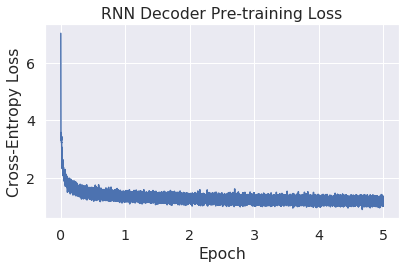

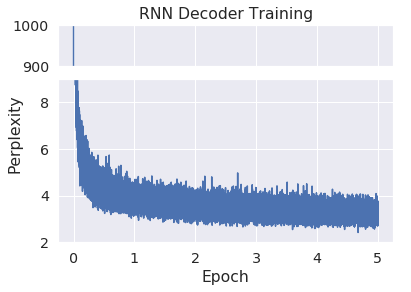

In [182]:
fn = "../../logs/4layer1024allaround_pretraining5epochs5lr_b/4layer1024allar" +\
    "ound_pretraining5epochs5lr_b.trainf"

make_plot(load_df(fn), "loss", "Cross-Entropy Loss", "RNN Decoder Pre-training Loss")
plt.tight_layout()
plt.savefig("rnn_decoder_pretraining_loss.pdf")
make_split_plot(df, (2,9), (900,1000), "perplexity", "Perplexity", "RNN Decoder Training")

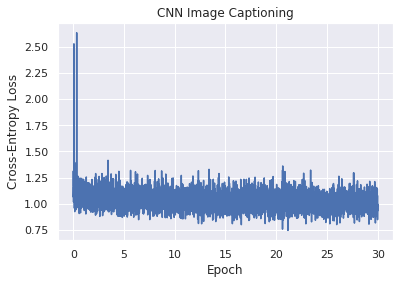

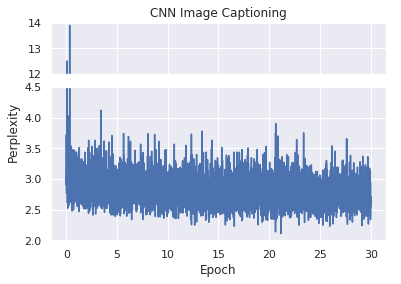

In [116]:
fn = "../../logs/256CNN_4layer1024_30epochs6lr/256CNN_4layer1024_30epochs6lr.train"
make_plot(load_df(fn), "loss", "Cross-Entropy Loss", "CNN Image Captioning", skip=5)
make_split_plot(load_df(fn), (2, 4.5), (12,14), "perplexity", "Perplexity", "CNN Image Captioning", skip=5, ratios=[1,3])
# make_plot(load_df(fn), "perplexity", "Perplexity", "CNN Image Captioning", skip=5)

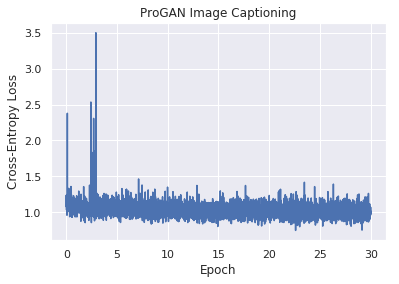

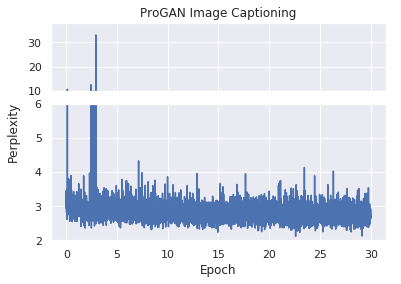

In [115]:
fn = "../../logs/256proGAN_4layer1024_30epochs6lr/256proGAN_4layer1024_30epochs6lr.train"
make_plot(load_df(fn), "loss", "Cross-Entropy Loss", "ProGAN Image Captioning", skip=5)
make_split_plot(load_df(fn), (2, 6), (10,38), "perplexity", "Perplexity", "ProGAN Image Captioning", skip=5, ratios=[1,2])

# Plots with the same axes

In [166]:
progan_log = "../../logs/256proGAN_4layer1024_30epochs6lr_v2/256proGAN_4layer1024_30epochs6lr_v2.train"
cnn_log = "../../logs/256CNN_4layer1024_30epochs6lr/256CNN_4layer1024_30epochs6lr.train"

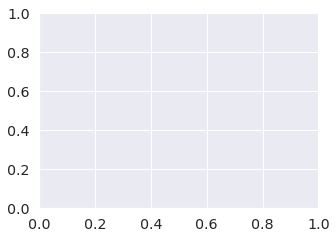

In [180]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots()
fig.set_size_inches(5, 3.6)

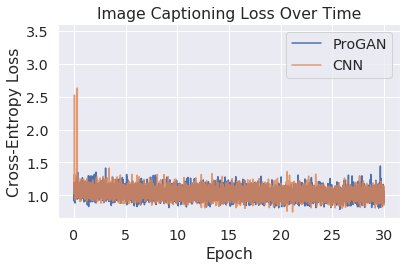

In [181]:
make_plot(load_df(progan_log), "loss", "Cross-Entropy Loss", "ProGAN Image Captioning", skip=5, ylims=(.65, 3.6), label="ProGAN",alpha=1)
# plt.savefig("progan_CE_loss.pdf")
make_plot(load_df(cnn_log), "loss", "Cross-Entropy Loss", "Image Captioning Loss Over Time", skip=5, ylims=(.65, 3.6), label="CNN", alpha=0.8)
plt.tight_layout()
plt.legend()
plt.savefig("progan_vs_cnn_loss_v3.pdf")

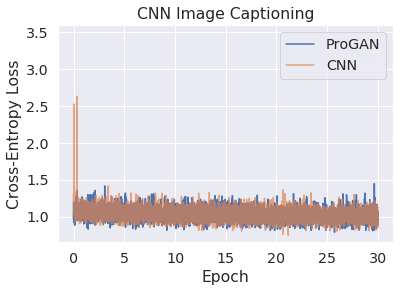

In [172]:
plt.figure()
make_plot(load_df(progan_log), "loss", "Cross-Entropy Loss", "ProGAN Image Captioning", skip=5, ylims=(.65, 3.6), label="ProGAN",alpha=1)
# plt.savefig("progan_CE_loss.pdf")
# plt.figure()
make_plot(load_df(cnn_log), "loss", "Cross-Entropy Loss", "CNN Image Captioning", skip=5, ylims=(.65, 3.6), label="CNN", alpha=.7)
# plt.legend()
plt.tight
plt.savefig("cnn_CE_loss.pdf")

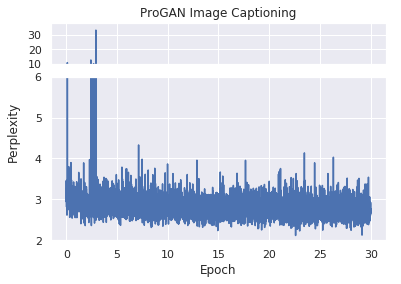

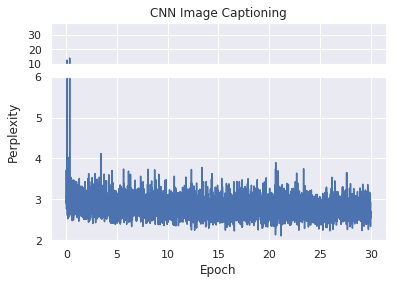

In [127]:
make_split_plot(load_df(progan_log), (2, 6), (10,38), "perplexity", "Perplexity", "ProGAN Image Captioning", skip=5, ratios=[1,4])
make_split_plot(load_df(cnn_log), (2, 6), (10,38), "perplexity", "Perplexity", "CNN Image Captioning", skip=5, ratios=[1,4])


In [132]:
load_df(progan_log)[-1000:]["perplexity"].mean()


2.75478325444011

In [131]:
load_df(cnn_log)[-1000:]["perplexity"].mean()

2.7496433857138936

In [133]:
load_df(progan_log)[-1000:]["loss"].mean()

1.010697650849819

In [134]:
load_df(cnn_log)[-1000:]["loss"].mean()

1.0090499903559684

In [135]:
load_df(progan_log)[-1000:]["perplexity"].mean() - load_df(cnn_log)[-1000:]["perplexity"].mean()

0.005139868726216523

In [136]:
load_df(progan_log)[-1000:]["perplexity"].std()

0.20264766216054897

In [137]:
load_df(progan_log)[-1000:]["loss"].mean() - load_df(cnn_log)[-1000:]["loss"].mean()

0.0016476604938506778

In [138]:
load_df(progan_log)[-1000:]["loss"].std()

0.07237220707018824